# Prediction using Correlation Analysis and Multiple Linear Regression

### Loading libraries and original dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Read data
ranking_data = pd.read_excel("FT OE rankings 2007-2020.xlsx")

In [4]:
#create constant dataset 
ranking_data_const = pd.read_excel("FT OE rankings 2007-2020.xlsx")
ranking_data_const

,Ranking,Year,Rank,3-year average,School name,EBS 2019 TOP 20,Country,Europe,DACH,Ranking criteria,Ranking weight,Value
0,OE,2020-01-01,1,1.0,IMD,Yes,Switzerland,Yes,Yes,Aims achieved,8.4,4
1,OE,2020-01-01,1,1.0,IMD,Yes,Switzerland,Yes,Yes,Course design,8.6,4
2,OE,2020-01-01,1,1.0,IMD,Yes,Switzerland,Yes,Yes,Facilities,7.6,3
3,OE,2020-01-01,1,1.0,IMD,Yes,Switzerland,Yes,Yes,Faculty,8.7,2
4,OE,2020-01-01,1,1.0,IMD,Yes,Switzerland,Yes,Yes,Faculty diversity,5.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
15115,OE,2007-01-01,50,NaN,Lagos Business School,No,Nigeria,No,No,New skills & learning,8.8,50
15116,OE,2007-01-01,50,NaN,Lagos Business School,No,Nigeria,No,No,Partner schools,3.0,30
15117,OE,2007-01-01,50,NaN,Lagos Business School,No,Nigeria,No,No,Preparation,7.8,50
15118,OE,2007-01-01,50,NaN,Lagos Business School,No,Nigeria,No,No,Quality of participants,7.9,50


<h4>Removing data columns of the attributes not required for the consideration of factors that affect the ranking in our multiple linear regression model</h4>

In [ ]:
df_only_factors = ranking_data.drop(["Ranking", "3-year average", "Ranking weight"],axis = 1)
df_only_factors["Year"]= df_only_factors["Year"].dt.yea
df_only_factors

<h4>Converting data to binary 0 and 1 for consideration in the MLR Model</h4>

In [6]:
df_only_factors_binary = df_only_factors.replace(['Yes', 'No'], [1,0])
df_only_factors_binary

,Year,Rank,School name,EBS 2019 TOP 20,Country,Europe,DACH,Ranking criteria,Value
0,2020,1,IMD,1,Switzerland,1,1,Aims achieved,4
1,2020,1,IMD,1,Switzerland,1,1,Course design,4
2,2020,1,IMD,1,Switzerland,1,1,Facilities,3
3,2020,1,IMD,1,Switzerland,1,1,Faculty,2
4,2020,1,IMD,1,Switzerland,1,1,Faculty diversity,5
...,...,...,...,...,...,...,...,...,...
15115,2007,50,Lagos Business School,0,Nigeria,0,0,New skills & learning,50
15116,2007,50,Lagos Business School,0,Nigeria,0,0,Partner schools,30
15117,2007,50,Lagos Business School,0,Nigeria,0,0,Preparation,50
15118,2007,50,Lagos Business School,0,Nigeria,0,0,Quality of participants,50


<h4> Exporting to excel for manual transposing</h4>

In [8]:
df_only_factors_binary.to_excel("for_corr.xlsx")

<h3> Loading transposed data </h3>

This data includes all the rows from the original dataset and the following code takes each row with the first ranking criteria "Aims Achieved" as the main datarow for that year. The rest are duplicates due to the way the table was partially transposed in excel manually.

In [2]:
transposed = pd.read_excel("for_corr.xlsx",index_col=0)
transposed

,Year,Rank,School name,EBS 2019 TOP 20,Country,Europe,DACH,Ranking criteria,Value,Aims achieved,...,Follow-up,Food & accommodation,Growth,International location,International participants,New skills & learning,Partner schools,Preparation,Quality of participants,Teaching methods & materials
0,2020,1,IMD,1,Switzerland,1,1,Aims achieved,4,4,...,8,2,29,37,6,3,43,7,4,1
1,2020,1,IMD,1,Switzerland,1,1,Course design,4,4,...,2,29,37,6,3,43,7,4,1,3
2,2020,1,IMD,1,Switzerland,1,1,Facilities,3,3,...,29,37,6,3,43,7,4,1,3,3
3,2020,1,IMD,1,Switzerland,1,1,Faculty,2,2,...,37,6,3,43,7,4,1,3,3,9
4,2020,1,IMD,1,Switzerland,1,1,Faculty diversity,5,5,...,6,3,43,7,4,1,3,3,9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,2007,50,Lagos Business School,0,Nigeria,0,0,New skills & learning,50,50,...,0,0,0,0,0,0,0,0,0,0
15116,2007,50,Lagos Business School,0,Nigeria,0,0,Partner schools,30,30,...,0,0,0,0,0,0,0,0,0,0
15117,2007,50,Lagos Business School,0,Nigeria,0,0,Preparation,50,50,...,0,0,0,0,0,0,0,0,0,0
15118,2007,50,Lagos Business School,0,Nigeria,0,0,Quality of participants,50,50,...,0,0,0,0,0,0,0,0,0,0


In [3]:
final_corr_data = transposed[transposed["Ranking criteria"]== "Aims achieved"]
final_corr_data = final_corr_data.drop(['Ranking criteria', 'Value' ], axis =1)

In [4]:
final_corr_data

,Year,Rank,School name,EBS 2019 TOP 20,Country,Europe,DACH,Aims achieved,Course design,Facilities,...,Follow-up,Food & accommodation,Growth,International location,International participants,New skills & learning,Partner schools,Preparation,Quality of participants,Teaching methods & materials
0,2020,1,IMD,1,Switzerland,1,1,4,4,3,...,8,2,29,37,6,3,43,7,4,1
16,2020,2,University of Oxford: Saïd,1,UK,1,0,3,3,9,...,3,17,35,36,9,5,16,5,2,4
32,2020,3,Insead,1,France,1,0,6,8,5,...,10,8,31,21,4,17,26,10,3,5
48,2020,3,University of Michigan: Ross,0,US,0,0,2,1,1,...,20,11,38,20,32,2,30,4,8,2
64,2020,5,Stanford Graduate School of Business,0,US,0,0,1,13,6,...,15,1,42,56,10,4,36,3,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15040,2007,46,Católica Lisbon School of Business and Economics,0,Portugal,1,0,48,46,36,...,40,42,49,35,34,46,30,45,46,47
15056,2007,46,USB Executive Development,0,South Africa,0,0,46,47,44,...,48,45,13,23,33,44,40,47,47,46
15072,2007,48,Wits Business School,0,South Africa,0,0,49,49,48,...,50,47,10,30,40,48,30,48,42,48
15088,2007,49,Solvay Brussels School of Economics and Manage...,0,Belgium,1,0,47,48,45,...,47,50,48,36,10,49,21,49,40,49


In [5]:
final_corr_data.to_excel("correlation analysis.xlsx")

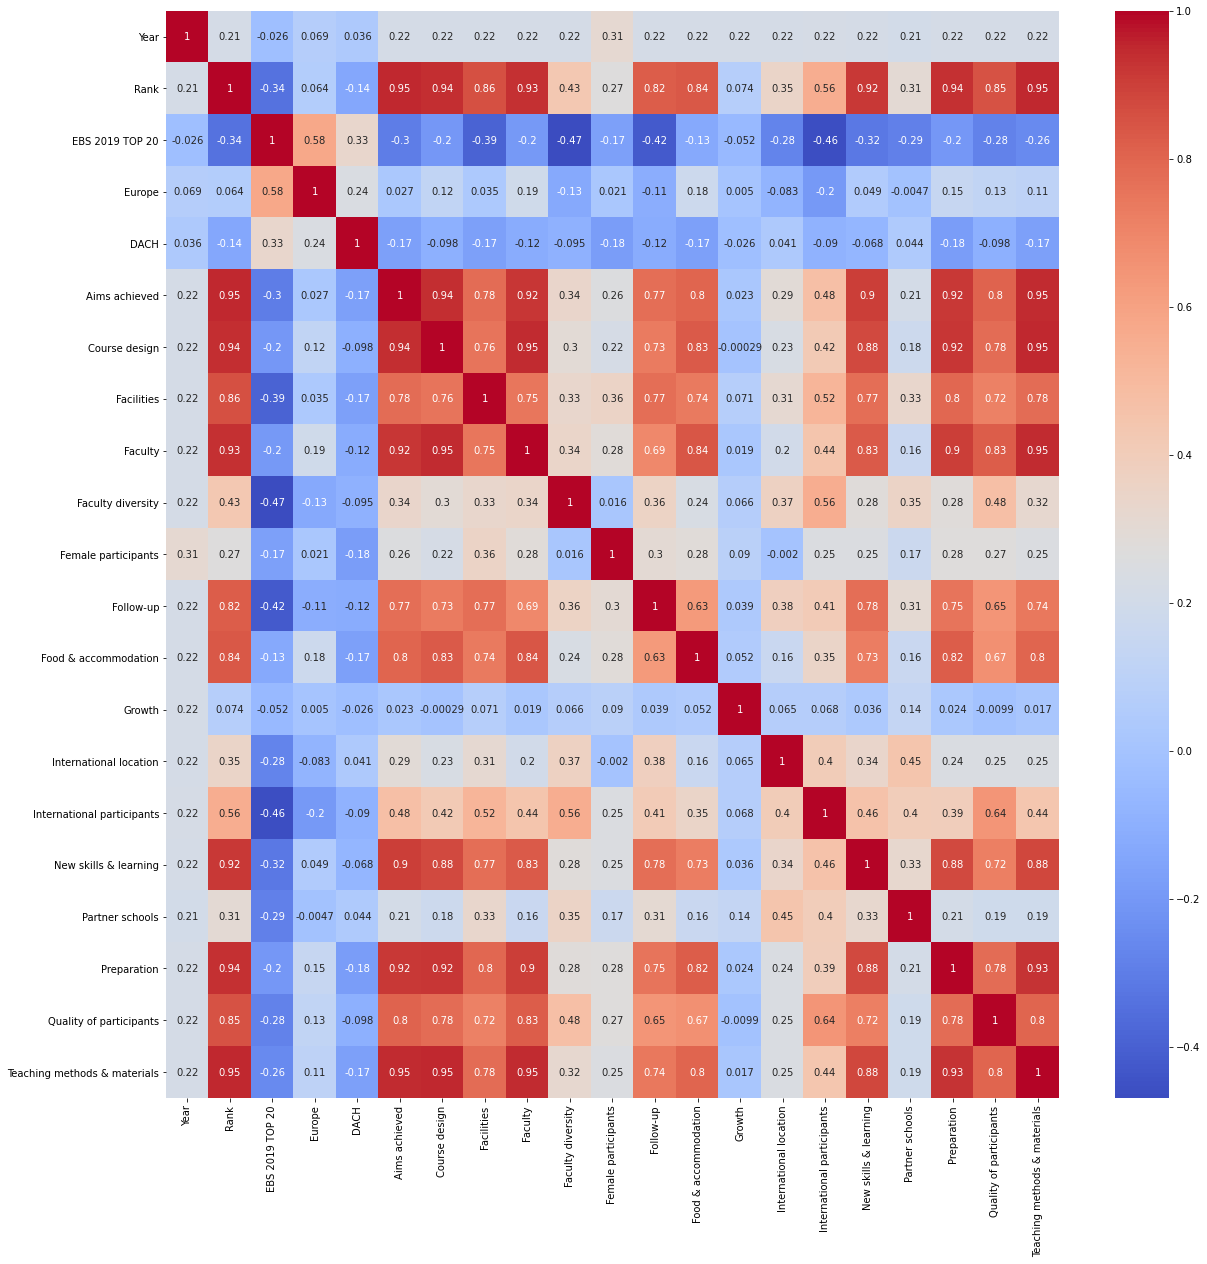

In [5]:
plt.figure(figsize=(20, 20))
sns.heatmap(final_corr_data.corr(), cmap='coolwarm', annot=True)
plt.savefig('correlation_heatmap_ranking_criteria.png')

In [11]:
corr_values = final_corr_data.corr()
corr_values.to_excel('Correlation_DV.xlsx')

### Multiple Linear Regression Model

In [8]:
final_corr_data.columns

Index(['Year', 'Rank', 'School name', 'EBS 2019 TOP 20', 'Country', 'Europe',
       'DACH', 'Aims achieved', 'Course design', 'Facilities', 'Faculty',
       'Faculty diversity', 'Female participants', 'Follow-up',
       'Food & accommodation', 'Growth', 'International location',
       'International participants', 'New skills & learning',
       'Partner schools', 'Preparation', 'Quality of participants',
       'Teaching methods & materials'],
      dtype='object')

In [9]:
x = final_corr_data[['EBS 2019 TOP 20', 'Europe',
       'DACH', 'Aims achieved', 'Course design', 'Facilities', 'Faculty',
       'Faculty diversity', 'Female participants', 'Follow-up',
       'Food & accommodation', 'Growth', 'International location',
       'International participants', 'New skills & learning',
       'Partner schools', 'Preparation', 'Quality of participants',
       'Teaching methods & materials']]
y = final_corr_data['Rank']

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [11]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [12]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  -4.855405496316678
Coefficients:


[('EBS 2019 TOP 20', -0.21319795878295206),
 ('Europe', -0.596850866320376),
 ('DACH', 0.6113631668236942),
 ('Aims achieved', 0.06168392685684804),
 ('Course design', 0.12317796111512827),
 ('Facilities', 0.10754860797885535),
 ('Faculty', 0.14892119864067307),
 ('Faculty diversity', 0.053086123571378104),
 ('Female participants', -0.0645247072279486),
 ('Follow-up', 0.0872384969218609),
 ('Food & accommodation', 0.07167636557445314),
 ('Growth', 0.03758059926097043),
 ('International location', 0.015325013754711044),
 ('International participants', 0.04079045474578961),
 ('New skills & learning', 0.14466971882512644),
 ('Partner schools', 0.02992355598991149),
 ('Preparation', 0.1234929755698816),
 ('Quality of participants', 0.08621138805316585),
 ('Teaching methods & materials', 0.07979802790586886)]

In [14]:
model_coeff = pd.DataFrame(mlr.coef_,['EBS 2019 TOP 20', 'Europe',
       'DACH', 'Aims achieved', 'Course design', 'Facilities', 'Faculty',
       'Faculty diversity', 'Female participants', 'Follow-up',
       'Food & accommodation', 'Growth', 'International location',
       'International participants', 'New skills & learning',
       'Partner schools', 'Preparation', 'Quality of participants',
       'Teaching methods & materials'], columns=['Coefficients'])
model_coeff

,Coefficients
EBS 2019 TOP 20,-0.213198
Europe,-0.596851
DACH,0.611363
Aims achieved,0.061684
Course design,0.123178
Facilities,0.107549
Faculty,0.148921
Faculty diversity,0.053086
Female participants,-0.064525
Follow-up,0.087238


In [15]:
model_coeff.to_excel('model_coefficients.xlsx')

#### Predicted values

In [43]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))


Prediction for test set: [63.13583193 74.40838257 45.25516571 57.78092604 63.57396492  2.37438307
 10.26008788 12.90696611 19.22462641 52.31297736 12.43820365 49.38235362
 24.70593564 50.93323464 48.92745386 73.86858337 40.65526663 29.25949665
 51.58610803 32.48189155 46.22405755 49.51453017 29.61459467 22.82709036
  9.95465819 21.54058147 38.48071357 15.07134825 65.96586814 21.43580193
 65.89810794 19.15963898 23.877085   35.33004289  7.83242185 75.44258025
 51.73522606 27.84657346 23.61365661  3.4479478  38.81428538 17.3504316
 49.54297332 39.38732969 43.30543286 38.8440453  65.19497848 13.21372445
 30.5767218  68.22264661 57.40070765 13.58240894 66.98530768  3.71754103
 29.35557069 76.81373229  2.30935183 21.84440772 13.77543474 39.78421484
 45.20429016 63.76875737 69.42003873 19.64642541 46.89871336 42.95410951
 70.98087904 43.72782776 10.49288609 49.54108639 39.59990221  9.15394907
 40.44665044 18.84421021 51.27419512 57.90715341 62.59542622  4.03514347
 46.87293746 44.675142    0

In [45]:
#visualizing actual and predicted values
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
2288,69,63.135832
3664,75,74.408383
1856,40,45.255166
2144,57,57.780926
5952,63,63.573965


### Model Evaluation

In [47]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100), "of the data fits the regression model")
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 98.81 of the data fits the regression model
Mean Absolute Error: 1.9639101526323073
Mean Square Error: 5.936920012693164
Root Mean Square Error: 2.436579572411532


<h4>Check the residual plots for assumptions of Linear Regression</h4>

<AxesSubplot:>

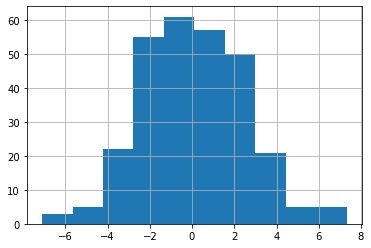

In [51]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_mlr})
results['residuals'] = results['Actual'] - results['Predicted']
results['residuals'].hist()

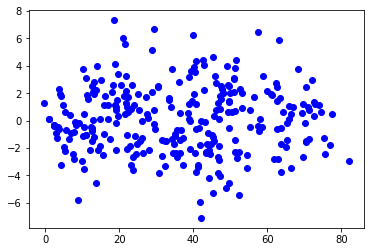

In [52]:
plt.scatter(results['Predicted'], results['residuals'],  color='blue')

<h4>Get the p values of the variables to check for significance</h4>

In [54]:
#In order to get the p values of the linear regression model we use statsmodels.api library 
import statsmodels.api as sm

mod = sm.OLS(y_train,x_train)

m1 = mod.fit()

p_values = m1.summary2().tables[1]['P>|t|']

In [55]:
round(p_values,4)

EBS 2019 TOP 20                 0.0000
Europe                          0.0928
DACH                            0.3423
Aims achieved                   0.0040
Course design                   0.0000
Facilities                      0.0000
Faculty                         0.0000
Faculty diversity               0.0000
Female participants             0.0000
Follow-up                       0.0000
Food & accommodation            0.0000
Growth                          0.0000
International location          0.5309
International participants      0.0000
New skills & learning           0.0000
Partner schools                 0.0005
Preparation                     0.0000
Quality of participants         0.0000
Teaching methods & materials    0.0029
Name: P>|t|, dtype: float64